In [2]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [3]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/home/seopzzang/miniconda3/envs/termpro/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


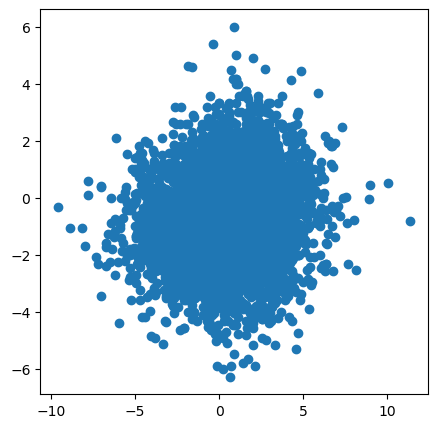

In [5]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

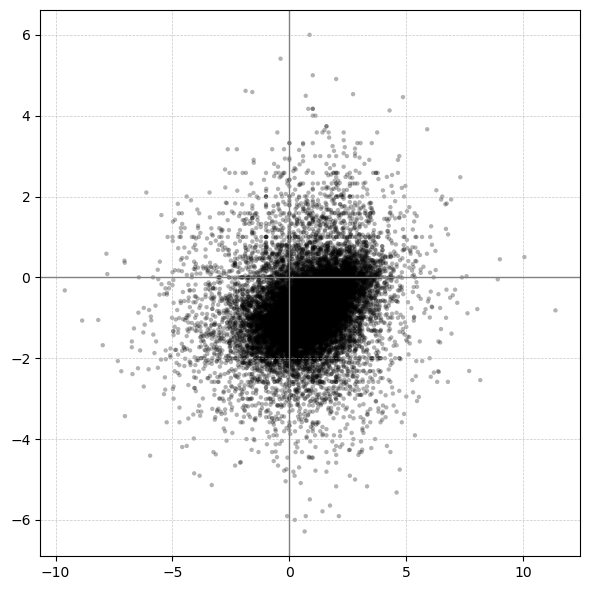

In [10]:
import numpy as np

# 로그 변환
x = np.log2(cnts['clip_enrichment'])
y = np.log2(cnts['rden_change'])


# Figure, Axes 생성
fig, ax = plt.subplots(figsize=(6, 6))

# 산점도: 작은 점, 반투명, 검정
ax.scatter(
    x, y,
    s=10,          # 점 크기
    alpha=0.3,     # 투명도
    color='black',
    edgecolors='none'
)

# x=0, y=0 선 추가
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

# 그리드 켜기
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [28]:
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/home/seopzzang/miniconda3/envs/termpro/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/seopzzang/miniconda3/envs/termpro/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


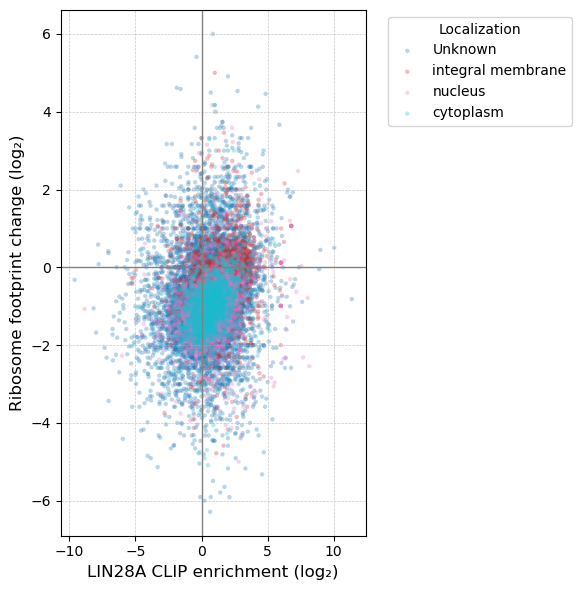

In [ ]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) mouselocal 로드 및 전처리
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv(
    'https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt',
    sep='\t'
)
# mouselocal gene_id도 version 제거
mouselocal['gene_id'] = mouselocal['gene_id'].str.split('.').str[0]

# 2) cnts 복사 & gene_id 컬럼 직접 생성
df = cnts.copy()
df['gene_id'] = df.index.to_series().str.split('.').str[0]

# 3) 이제 gene_id 로 localization 병합
df = df.merge(
    mouselocal[['gene_id', 'type']],
    on='gene_id',
    how='left'
)
df['Localization'] = df['type'].fillna('Unknown')

# 4) 로그 변환 x, y
df['x'] = np.log2(df['clip_enrichment'])
df['y'] = np.log2(df['rden_change'])

# 5) 컬러맵 준비
categories = df['Localization'].unique()
cmap = plt.get_cmap('tab10', len(categories))
color_map = {cat: cmap(i) for i, cat in enumerate(categories)}

# 6) 산점도 그리기
fig, ax = plt.subplots(figsize=(6,6))
for loc in categories:
    sub = df[df['Localization'] == loc]
    ax.scatter(
        sub['x'], sub['y'],
        s=10, alpha=0.3,
        color=color_map[loc],
        label=loc,
        edgecolors='none'
    )

# 7) 꾸미기
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel('LIN28A CLIP enrichment (log₂)', fontsize=12)
ax.set_ylabel('Ribosome footprint change (log₂)', fontsize=12)
ax.legend(title='Localization', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()